# Financial Planning with APIs and Simulations





In [1]:
# Import required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime


%matplotlib inline

In [2]:
# Load the environment variables from the .env file
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Part 1: Create a Financial Planner for Emergencies

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Review the response data from the API call
print(json.dumps(btc_response, sort_keys = False, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18671731,
            "total_supply": 18671731,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 59209.0,
                    "volume_24h": 51883912405,
                    "market_cap": 1105953343422,
                    "percentage_change_1h": 0.0721202702271008,
                    "percentage_change_24h": 1.19673903419775,
                    "percentage_change_7d": 15.1545096799901,
                    "percent_change_1h": 0.0721202702271008,
                    "percent_change_24h": 1.19673903419775,
                    "percent_change_7d": 15.1545096799901
                }
            },
            "last_updated": 1617388193
        }
    },
    "metadata": {
        "timestamp": 1617388193,
        "num_cryp

In [7]:
# API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Review the response data from the API call
print(json.dumps(eth_response, sort_keys = False, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115306212,
            "total_supply": 115306212,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2057.22,
                    "volume_24h": 35652344368,
                    "market_cap": 237512522295,
                    "percentage_change_1h": 0.19317620372581,
                    "percentage_change_24h": 6.96872950371445,
                    "percentage_change_7d": 29.6054281464582,
                    "percent_change_1h": 0.19317620372581,
                    "percent_change_24h": 6.96872950371445,
                    "percent_change_7d": 29.6054281464582
                }
            },
            "last_updated": 1617388103
        }
    },
    "metadata": {
        "timestamp": 1617388103,
        "num_crypto

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

print(btc_price)

59209.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

print(eth_price)

2057.22


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

print(f"${btc_value: .2f}")

$ 71050.80


In [11]:
# Compute the current value of the ETH holding 
eth_value = round(eth_coins * eth_price, 2)

print(f"${eth_value: .2f}")

$ 10903.27


In [12]:
# Total value of the cryptocurrency wallet

total_crypto_wallet = btc_value + eth_value

print(f"${total_crypto_wallet: .2f}")

$ 81954.07


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
start_date = pd.Timestamp('2020-04-01', tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Alpaca get_barset function to get current closing prices the portfolio
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = start_date
).df

df_portfolio

AGG                                      SPY  \
                             open   high     low   close    volume    open   
time                                                                         
2020-04-01 00:00:00-04:00  115.38  115.4  114.65  114.86  22701910  247.98   

                                                               
                               high    low   close     volume  
time                                                           
2020-04-01 00:00:00-04:00  257.6591  243.9  246.12  164045526

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
agg_close_price = float(df_portfolio['AGG']['close'])

agg_close_price

114.86

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
spy_close_price = float(df_portfolio['SPY']['close'])

spy_close_price

246.12

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value: .2f}")

The current value of the bond portfolio is $ 22972.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value: .2f}")

The current value of the stock portfolio is $ 27073.20


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current value of the bond and stock portfolio is ${total_stocks_bonds: .2f}")

The current value of the bond and stock portfolio is $ 50045.20


In [22]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current total portolfio balance
print(f"The current value of the total portfolio is ${total_portfolio: .2f}")

The current value of the total portfolio is $ 131999.27


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review 
savings_data

[81954.07, 50045.2]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ['amount'],
    index = ['crypto', 'stock/bond']
)

savings_df

,amount
crypto,81954.07
stock/bond,50045.20


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Composition of Current Total Portfolio'}, ylabel='amount'>

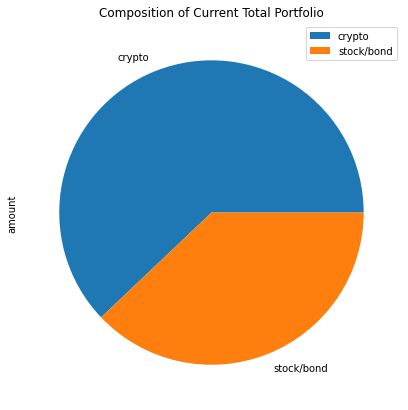

In [25]:
# Plot of the total value of the member's portfolio in a pie chart
savings_df.plot.pie(y = 'amount', title = 'Composition of Current Total Portfolio', figsize = (7, 7))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money to create your emergency fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! Your total portfolio value is equal to your emergency fund value goal.")
elif total_portfolio < emergency_fund_value:
    print(f"We are sorry, you are still ${emergency_fund_value - total_portfolio: .2f} away from reaching your goal.")


Congratulations! You have enough money to create your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 10 years back from your current date
today_date = str(datetime.datetime.now()).split()[0]
ten_years_ago = str(datetime.datetime.now() - datetime.timedelta(days=10*365)).split()[0]

start_date = pd.Timestamp(ten_years_ago, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()

# Display dates for verification
start_date, end_date

('2011-04-05T00:00:00-04:00', '2021-04-02T00:00:00-04:00')

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data and convert into DataFrame
df_portfolio_ten_year = alpaca.get_barset(
    tickers,
    timeframe, 
    start = start_date,
    end = end_date
).df


# Display both the first and last five rows of the DataFrame
display(df_portfolio_ten_year.head())
display(df_portfolio_ten_year.tail())

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-11-06 00:00:00-05:00  117.81  117.86  117.6699  117.80  5106146  349.93   
2020-11-09 00:00:00-05:00  117.40  117.47  117.0600  117.24  6073474  363.97   
2020-11-10 00:00:00-05:00  117.05  117.23  117.0300  117.05  4663301  353.49   
2020-11-11 00:00:00-05:00  117.06  117.18  117.0200  117.15  3001773  356.40   
2020-11-12 00:00:00-05:00  117.37  117.63  117.3300  117.62  7438935  355.58   

                                                                
                               high     low   close     volume  
time                                                            
2020-11-06 00:00:00-05:00  351.5100  347.65  350.19   58137413  
2020-11-09 00:00:00-05:00  364.3800  354.06  354.54  140613847  
2020-11-10 00:00:00-05:00  355.1800  350.51  354.07   69143380  
2020-11-11 00:00:00-05:00  357.5600  355.06  356.62   45627772  
2020-11-12 00:00:00-05:00  356.7182  351.26  353.28   57393573

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2021-03-26 00:00:00-04:00  113.91  114.075  113.860  113.93  3385851  390.93   
2021-03-29 00:00:00-04:00  113.52  114.000  113.520  113.72  5524113  394.40   
2021-03-30 00:00:00-04:00  113.64  113.850  113.525  113.82  4742520  394.42   
2021-03-31 00:00:00-04:00  113.84  113.980  113.710  113.82  5851348  395.34   
2021-04-01 00:00:00-04:00  113.93  114.050  113.830  114.02  9491631  398.40   

                                                              
                             high     low    close    volume  
time                                                          
2021-03-26 00:00:00-04:00  396.41  390.29  395.970  91121640  
2021-03-29 00:00:00-04:00  396.75  392.81  395.485  86133590  
2021-03-30 00:00:00-04:00  395.45  393.02  394.780  63446300  
2021-03-31 00:00:00-04:00  398.00  395.31  396.260  88555440  
2021-04-01 00:00:00-04:00  400.67  398.18  400.530  72714084

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
thirty_year_simulation = MCSimulation(
    portfolio_data= df_portfolio_ten_year,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*30,
)

# Review the simulation input data
thirty_year_simulation.portfolio_data.head()


AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2020-11-06 00:00:00-05:00  117.81  117.86  117.6699  117.80  5106146   
2020-11-09 00:00:00-05:00  117.40  117.47  117.0600  117.24  6073474   
2020-11-10 00:00:00-05:00  117.05  117.23  117.0300  117.05  4663301   
2020-11-11 00:00:00-05:00  117.06  117.18  117.0200  117.15  3001773   
2020-11-12 00:00:00-05:00  117.37  117.63  117.3300  117.62  7438935   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-11-06 00:00:00-05:00          NaN  349.93  351.5100  347.65  350.19   
2020-11-09 00:00:00-05:00    -0.004754  363.97  364.3800  354.06  354.54   
2020-11-10 00:00:00-05:00    -0.001621  353.49  355.1800  350.51  354.07   
2020-11-11 00:00:00-05:00     0.000854  356.40  357.5600  355.06  356.62   
2020-11-12 00:00:00-05:00     0.004012  355.58  356.7182  351.26  353.28   

                                                   
                              volume daily_return  
time                                               
2020-11-06 00:00:00-05:00   58137413          NaN  
2020-11-09 00:00:00-05:00  140613847     0.012422  
2020-11-10 00:00:00-05:00   69143380    -0.001326  
2020-11-11 00:00:00-05:00   45627772     0.007202  
2020-11-12 00:00:00-05:00   57393573    -0.009366

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993696,0.992663,0.991676,1.004671,1.000744,1.004249,1.002624,0.997306,0.999344,0.994720,...,1.012130,1.000768,1.002442,1.008461,0.996254,1.005223,1.002280,1.006259,0.996413,0.991872
2,0.999153,0.992673,0.993954,1.008548,0.999157,1.002272,1.007412,1.005960,1.006812,0.998568,...,1.017072,1.007659,1.000776,1.016033,1.006373,1.008758,0.994193,1.000390,0.999763,0.991649
3,0.999524,0.983757,0.989658,1.010098,0.996504,1.006446,1.002327,1.009973,1.015971,1.004006,...,1.013802,1.009095,1.004286,1.021028,1.009076,1.011213,0.998645,1.002838,0.992336,0.986201
4,1.000401,0.988770,0.989402,1.011474,1.011057,1.012908,1.004790,1.018896,1.017480,0.992751,...,1.016463,1.010776,0.995010,1.023797,1.001632,1.015595,0.990389,1.000228,1.002178,0.989975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,204.829071,162.926043,521.130467,145.608526,118.127665,222.296355,167.215816,165.301237,195.575768,120.700187,...,237.242564,128.090249,195.431919,397.356187,179.237968,427.371294,150.281281,289.126695,263.822135,150.331053
7557,206.125307,163.441968,518.881465,144.909894,119.852509,221.270766,166.372570,166.437761,195.543880,121.125700,...,239.681778,126.712031,194.084432,398.342039,180.191705,432.064898,150.539484,289.864628,265.393052,149.551189
7558,205.827559,163.290065,520.488530,145.000416,119.586110,220.612249,166.636016,166.514404,196.362717,120.946504,...,238.541842,126.421471,195.641116,398.101386,181.195795,432.927441,150.896051,287.565183,268.115075,150.263948
7559,206.813202,163.548828,520.214445,144.791888,120.017314,220.524701,167.647000,167.927950,196.724301,120.256220,...,238.860556,125.656533,195.077691,400.236720,182.356022,429.256640,150.079688,285.468335,267.465283,150.286711


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

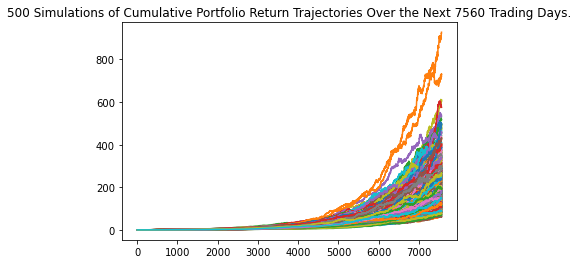

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

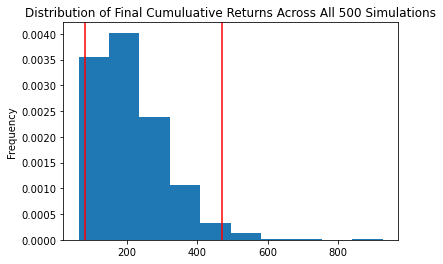

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(thirty_year_simulation_statistics)

count           500.000000
mean            212.164833
std             105.591399
min              62.642403
25%             135.896489
50%             189.734967
75%             263.739501
max             927.591723
95% CI Lower     80.659712
95% CI Upper    471.725384
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the bond and stock portfolio is ${total_stocks_bonds: .2f}")


The current value of the bond and stock portfolio is $ 50045.20


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = thirty_year_simulation_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = thirty_year_simulation_statistics[9] * total_stocks_bonds


# Print the result of your calculations
print(f"There is a 95% chance that a valuation of ${total_stocks_bonds:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")


There is a 95% chance that a valuation of $50,045.20 in the portfolio over the next year will end within in the range of $4,036,631.40 and $23,607,591.17.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_year_simulation = MCSimulation(
    portfolio_data= df_portfolio_ten_year,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)


# Review the simulation input data
ten_year_simulation.portfolio_data.head()


AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2020-11-06 00:00:00-05:00  117.81  117.86  117.6699  117.80  5106146   
2020-11-09 00:00:00-05:00  117.40  117.47  117.0600  117.24  6073474   
2020-11-10 00:00:00-05:00  117.05  117.23  117.0300  117.05  4663301   
2020-11-11 00:00:00-05:00  117.06  117.18  117.0200  117.15  3001773   
2020-11-12 00:00:00-05:00  117.37  117.63  117.3300  117.62  7438935   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-11-06 00:00:00-05:00          NaN  349.93  351.5100  347.65  350.19   
2020-11-09 00:00:00-05:00    -0.004754  363.97  364.3800  354.06  354.54   
2020-11-10 00:00:00-05:00    -0.001621  353.49  355.1800  350.51  354.07   
2020-11-11 00:00:00-05:00     0.000854  356.40  357.5600  355.06  356.62   
2020-11-12 00:00:00-05:00     0.004012  355.58  356.7182  351.26  353.28   

                                                   
                              volume daily_return  
time                                               
2020-11-06 00:00:00-05:00   58137413          NaN  
2020-11-09 00:00:00-05:00  140613847     0.012422  
2020-11-10 00:00:00-05:00   69143380    -0.001326  
2020-11-11 00:00:00-05:00   45627772     0.007202  
2020-11-12 00:00:00-05:00   57393573    -0.009366

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002406,1.002118,0.991407,0.994727,0.998542,1.008073,1.010953,1.003118,0.999359,1.001841,...,1.003342,0.993922,0.995776,0.997671,0.995683,1.011252,1.001734,1.003822,0.999979,0.991912
2,0.996468,1.016026,1.002037,1.005319,0.996433,1.006291,1.004953,1.000674,0.992393,1.008502,...,1.016867,0.998941,0.980964,1.017741,0.999039,1.012791,1.004281,1.013214,1.003821,0.994293
3,0.999823,1.019487,1.002563,1.008730,0.996649,0.991665,1.001293,1.005555,0.993865,1.015709,...,1.020486,0.995763,0.986476,1.021031,1.009543,1.026264,1.006225,1.014088,1.000730,1.005685
4,1.010078,1.022893,1.001290,1.010571,0.998052,0.983649,0.998104,0.999776,0.995555,1.016736,...,1.028536,0.995889,0.992961,1.023252,1.010946,1.025355,1.021853,1.000973,1.002848,1.006827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,13.613530,17.447418,16.463179,16.860819,26.736554,8.792250,24.407019,15.865810,12.566586,14.424081,...,13.918204,15.262034,13.378888,34.443484,12.069861,13.560832,17.540702,14.104952,6.650954,17.485963
2517,13.629745,17.331082,16.520721,17.033625,26.718747,8.858921,24.313884,15.874918,12.742339,14.314865,...,13.927608,15.394696,13.277442,34.283243,12.014910,13.647615,17.389696,14.112589,6.588983,17.535809
2518,13.759658,17.253816,16.494264,17.199581,26.600566,8.873248,24.364757,15.967733,12.681470,14.397507,...,13.768555,15.608536,13.140023,34.452472,11.960672,13.679167,17.497738,14.116980,6.679187,17.792749
2519,13.730800,17.344338,16.780152,17.134898,26.433626,8.964827,24.381746,16.048342,12.575851,14.391828,...,13.726639,15.547054,13.075985,34.484616,11.902789,13.742502,17.470280,14.151534,6.659932,18.002771


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

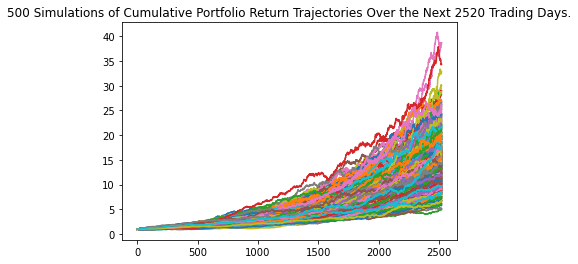

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

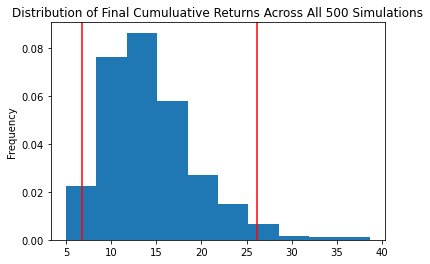

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
ten_year_simulation_statistics = ten_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(ten_year_simulation_statistics)

count           500.000000
mean             14.368600
std               5.104517
min               4.947318
25%              10.716933
50%              13.594731
75%              16.854138
max              38.710312
95% CI Lower      6.799485
95% CI Upper     26.164149
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the bond and stock portfolio is ${total_stocks_bonds: .2f}")


The current value of the bond and stock portfolio is $ 50045.20


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_year_simulation_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = ten_year_simulation_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that a valuation of ${total_stocks_bonds:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")


There is a 95% chance that a valuation of $50,045.20 in the portfolio over the next year will end within in the range of $340,281.57 and $1,309,390.08.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

While there is always consideration of additional assets and what a member's retirement goals are, the simulations suggest that it is significantly advantageous (and profitable) for credit union members focus on a thirty year return; however, the more heavily weight the portfolio to stocks is more advantages. Running the ten year simulation, weighting the portfolio more heavily to bonds, reveals that a significant amount of return will be lost as opposed to the stock-heavy portfolio. Overall, a credit union member should weigh a portfolio more heavily towards bonds, but understand that giving the portfolio longer than ten years will yield significant financial benefits that will help with retirement. 